# Resolution effects on TabularCEM


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pst.SSP import PopStar
from pst import models
from astropy import units as u

In [2]:
ssp = PopStar(IMF='cha')
ssp.cut_wavelength(3000, 11000)

> Initialising Popstar models (IMF='cha')
--> Only stellar continuum
[SSP] Models cut between 3000.0 Angstrom 11000.0 Angstrom


In [3]:
lbtime = np.geomspace(1e-3, 13.7, 300)
time = 13.7 - lbtime[::-1]
time[-1] = 13.7

lbtime2 = np.geomspace(1e-3, 13.7, 10)
# lbtime2 = np.linspace(0, 1, 15)**2 * 13.7
time2 = 13.7 - lbtime2[::-1]
time2[-1] = 13.7

dummy_t = np.linspace(0, 13.7, 1000) * u.Gyr

tau = 30.0
alpha = -2.0
z_0 = 0.02
t_0 = 7.0

def exponential_sfh(time, tau):
    m =  (1 - np.exp(-time / tau)) 
    m /= m[-1]
    return m* u.Msun

def z_star(time, alpha, z_0, t_0):
    z = z_0 * (1 - np.power((time + t_0)/ t_0, alpha))
    return z * u.dimensionless_unscaled

In [4]:
m1 = exponential_sfh(time, tau)
z1 = np.ones_like(m1.value) * 0.02 * u.dimensionless_unscaled
z1 = z_star(time, alpha, z_0, t_0)

# time2 = np.interp(np.array([0, 0.5, 0.9, 0.99, 1.0]) * u.Msun,
#                   exponential_sfh(dummy_t.to_value('Gyr'), tau), dummy_t).to_value('Gyr')

m2 = exponential_sfh(time2, tau)
z2 = np.ones_like(m2) * 0.02 * u.dimensionless_unscaled
z2 = z_star(time2, alpha, z_0, t_0)


Text(0.5, 0, 'Cosmic time (Gyr)')

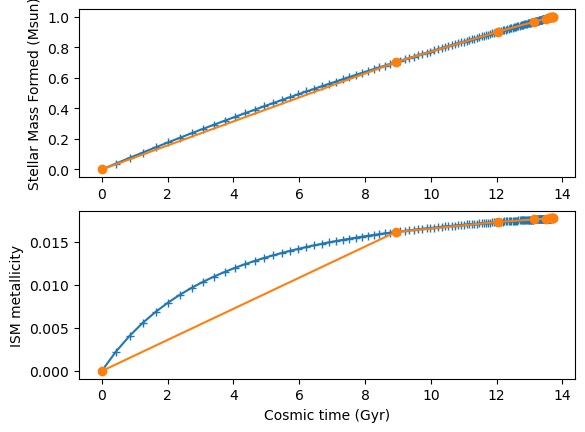

In [5]:
plt.figure()
plt.subplot(211)
plt.plot(time, m1, '-+')
plt.plot(time2, m2, '-o')
plt.ylabel("Stellar Mass Formed (Msun)")
plt.subplot(212)
plt.plot(time, z1, '-+')
plt.plot(time2, z2, '-o')
plt.ylabel("ISM metallicity")
plt.xlabel("Cosmic time (Gyr)")


In [6]:
model1 = models.TabularCEM(times=time * u.Gyr, masses=m1, metallicities=z1)
model2 = models.TabularCEM(times=time2 * u.Gyr, masses=m2, metallicities=z2)

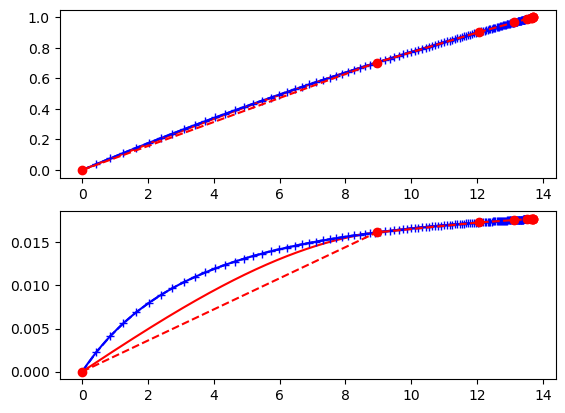

In [12]:
plt.figure()
plt.subplot(211)
plt.plot(dummy_t, model1.stellar_mass_formed(dummy_t), c='b')
plt.plot(dummy_t, model2.stellar_mass_formed(dummy_t), c='r')
plt.plot(time, m1, '--+', c='b')
plt.plot(time2, m2, '--o', c='r')
plt.subplot(212)
plt.plot(dummy_t, model1.ism_metallicity(dummy_t), c='b')
plt.plot(dummy_t, model2.ism_metallicity(dummy_t), c='r')
plt.plot(time, z1, '--+', c='b')
plt.plot(time2, z2, '--o', c='r')


In [13]:
sed1 = model1.compute_SED(ssp, t_obs=13.7 * u.Gyr, allow_negative=False)
sed2 = model2.compute_SED(ssp, t_obs=13.7 * u.Gyr, allow_negative=False)

MEDIAN OFFSET:  0.9605850050285251


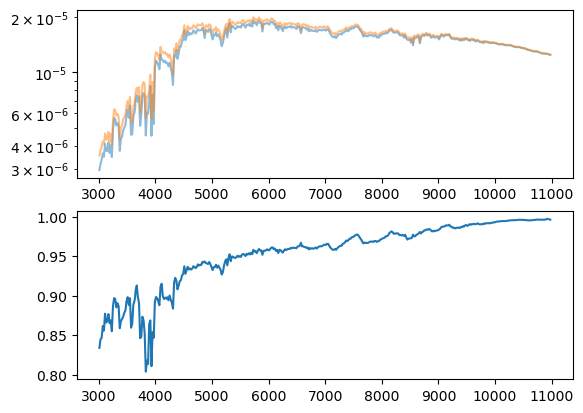

In [15]:
plt.figure()
plt.subplot(211)
plt.plot(ssp.wavelength, sed1, alpha=0.5)
plt.plot(ssp.wavelength, sed2, alpha=0.5)
plt.yscale('log')

plt.subplot(212)
plt.plot(ssp.wavelength, sed1 / sed2)

print("MEDIAN OFFSET: ", np.nanmedian(sed1 / sed2))